# Prediction of sepsis before conventional methods

## 1)Used Machine Learning Gradient Boosting Classifier
## 2)Used Deep Learning Neural Network Architecture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

Dataset Loading

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,1.0,0.0,17072.0
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,2.0,0.0,17072.0
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,3.0,0.0,17072.0
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,4.0,0.0,17072.0
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0.0,NaN,NaN,-0.02,5.0,0.0,17072.0


Get information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84097 entries, 0 to 84096
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        84097 non-null  int64  
 1   Hour              84097 non-null  int64  
 2   HR                77454 non-null  float64
 3   O2Sat             73795 non-null  float64
 4   Temp              28570 non-null  float64
 5   SBP               71029 non-null  float64
 6   MAP               75295 non-null  float64
 7   DBP               44508 non-null  float64
 8   Resp              75660 non-null  float64
 9   EtCO2             0 non-null      float64
 10  BaseExcess        8499 non-null   float64
 11  HCO3              6681 non-null   float64
 12  FiO2              11746 non-null  float64
 13  pH                9385 non-null   float64
 14  PaCO2             7190 non-null   float64
 15  SaO2              4080 non-null   float64
 16  AST               1207 non-null   float6

Get information of missing values in each column

In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0              0
Hour                    0
HR                   6643
O2Sat               10302
Temp                55527
SBP                 13068
MAP                  8802
DBP                 39589
Resp                 8437
EtCO2               84097
BaseExcess          75598
HCO3                77416
FiO2                72351
pH                  74712
PaCO2               76907
SaO2                80017
AST                 82890
BUN                 77296
Alkalinephos        82915
Calcium             79981
Chloride            77186
Creatinine          78586
Bilirubin_direct    83990
Glucose             73837
Lactate             81350
Magnesium           77590
Phosphate           79892
Potassium           74987
Bilirubin_total     83107
TroponinI           84004
Hct                 74269
Hgb                 76784
PTT                 80063
WBC                 77894
Fibrinogen          83593
Platelets           78744
Age                     1
Gender

To remove the first column as it is of no use

In [6]:
df = df.drop(df.columns[0], axis=1)


In [7]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

Data Preprocessing

In [8]:
# First convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [9]:
df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,1.0,0.0,17072.0
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,2.0,0.0,17072.0
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,3.0,0.0,17072.0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,4.0,0.0,17072.0
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,...,NaN,330.0,68.54,0.0,NaN,NaN,-0.02,5.0,0.0,17072.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84097 entries, 0 to 84096
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              84097 non-null  int64  
 1   HR                77454 non-null  float64
 2   O2Sat             73795 non-null  float64
 3   Temp              28570 non-null  float64
 4   SBP               71029 non-null  float64
 5   MAP               75295 non-null  float64
 6   DBP               44508 non-null  float64
 7   Resp              75660 non-null  float64
 8   EtCO2             0 non-null      float64
 9   BaseExcess        8499 non-null   float64
 10  HCO3              6681 non-null   float64
 11  FiO2              11746 non-null  float64
 12  pH                9385 non-null   float64
 13  PaCO2             7190 non-null   float64
 14  SaO2              4080 non-null   float64
 15  AST               1207 non-null   float64
 16  BUN               6801 non-null   float6

In [12]:
#To replace the missing values, we will use the mean of the column
df = df.dropna(axis=1, how='all')  # Drop columns where all values are NaN
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


df_imputed.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0.0,85.067435,97.286408,37.047208,121.104257,78.563682,59.60679,18.818854,-0.643429,24.150576,...,322.949405,199.933682,68.54,0.0,0.514991,0.485009,-0.02,1.0,0.0,17072.0
1,1.0,65.000000,100.000000,37.047208,121.104257,72.000000,59.60679,16.500000,-0.643429,24.150576,...,322.949405,199.933682,68.54,0.0,0.514991,0.485009,-0.02,2.0,0.0,17072.0
2,2.0,78.000000,100.000000,37.047208,121.104257,42.500000,59.60679,18.818854,-0.643429,24.150576,...,322.949405,199.933682,68.54,0.0,0.514991,0.485009,-0.02,3.0,0.0,17072.0
3,3.0,73.000000,100.000000,37.047208,121.104257,78.563682,59.60679,17.000000,-0.643429,24.150576,...,322.949405,199.933682,68.54,0.0,0.514991,0.485009,-0.02,4.0,0.0,17072.0
4,4.0,70.000000,100.000000,37.047208,129.000000,74.000000,69.00000,14.000000,-0.643429,26.000000,...,322.949405,330.000000,68.54,0.0,0.514991,0.485009,-0.02,5.0,0.0,17072.0


Creation of Independent and Dependent Variables

In [13]:
X = df_imputed.drop('SepsisLabel', axis=1)
y = df_imputed['SepsisLabel']


Train-Test split

In [14]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
print(y_train.value_counts())

SepsisLabel
0.000000    65805
1.000000     1471
0.021713        1
Name: count, dtype: int64


Handling unbalanced data

In [21]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter


# Check if y_train is continuous or categorical
if y_train.dtype in ['float64', 'int64'] and len(y_train.unique()) > 20:
    print("\nDetected continuous target. Applying SMOTER (SMOTE for Regression)...")
    smoter = SMOTER(random_state=42)
    X_train_resampled, y_train_resampled = smoter.fit_resample(X_train, y_train)

else:
    # Ensure y_train is categorical for SMOTE
    if y_train.dtype in ['float64', 'int64']:
        y_train = y_train.astype(int)  # Convert continuous-looking values to discrete classes

    elif y_train.dtype == 'object':
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)  # Encode string labels into numeric classes

    # Check class imbalance
    class_ratio = y_train.min() / y_train.sum()

    if class_ratio < 0.2:
        print("\nApplying SMOTE to handle class imbalance...")
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        print("After SMOTE, class distribution:")
        print(pd.Series(y_train_resampled).value_counts())
    else:
        print("\nClass distribution is balanced. No SMOTE applied.")
        X_train_resampled, y_train_resampled = X_train, y_train

# Output the resampled dataset shape
print(f"\nResampled X_train shape: {X_train_resampled.shape}")
print(f"Resampled y_train shape: {y_train_resampled.shape}")


Applying SMOTE to handle class imbalance...
After SMOTE, class distribution:
SepsisLabel
0    65806
1    65806
Name: count, dtype: int64

Resampled X_train shape: (131612, 41)
Resampled y_train shape: (131612,)


## Gradient Boosting Model

In [22]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [23]:
print("\nTraining a Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train_scaled, y_train_resampled)


Training a Gradient Boosting Classifier...


GradientBoostingClassifier(n_estimators=50, random_state=42)

In [24]:
print("\nEvaluating model on test set...")
y_pred = gb_model.predict(X_test_scaled)


Evaluating model on test set...


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     16465
         1.0       0.10      0.57      0.18       355

    accuracy                           0.89     16820
   macro avg       0.55      0.73      0.56     16820
weighted avg       0.97      0.89      0.92     16820



In [26]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[14732  1733]
 [  154   201]]


In [27]:
#the predicted probabilities of the positive class
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.8258


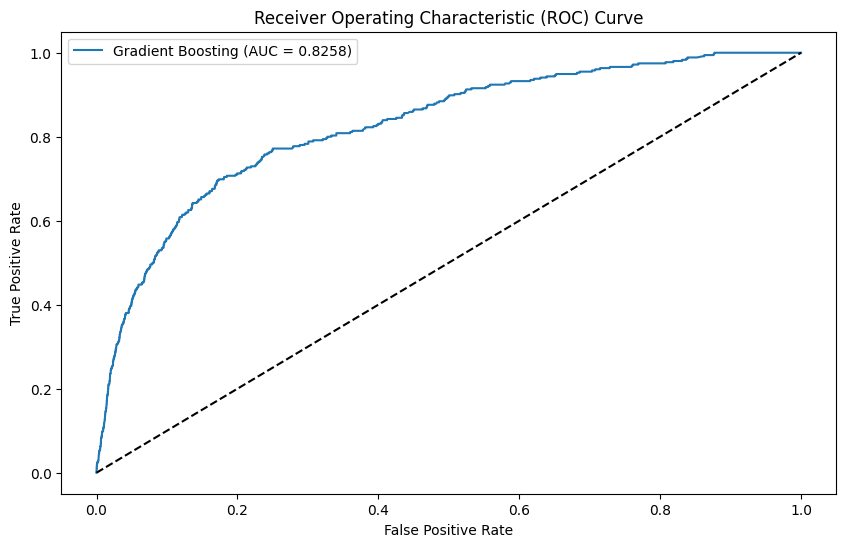

In [28]:
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # random prediction curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [29]:
import pickle
print("\nSaving model as 'sepsis_prediction_model.pkl'...")
with open('sepsis_prediction_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

print("\nModel development complete!")


Saving model as 'sepsis_prediction_model.pkl'...

Model development complete!


## Neural Network

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
n_features = X_train_scaled.shape[1]

In [32]:
model = Sequential([
    # Input layer
    Dense(128, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 1
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    # Hidden layer 2
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer - binary classification
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,193 (63.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [35]:
early_stopping = EarlyStopping(
    monitor='val_auc',
    patience=3,
    mode='max',
    restore_best_weights=True
)

In [36]:
history = model.fit(
    X_train_scaled,
    y_train_resampled,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7104 - auc: 0.7480 - loss: 0.5832 - val_accuracy: 0.7420 - val_auc: 0.0000e+00 - val_loss: 0.5395
Epoch 2/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7938 - auc: 0.8693 - loss: 0.4367 - val_accuracy: 0.8393 - val_auc: 0.0000e+00 - val_loss: 0.4339
Epoch 3/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8271 - auc: 0.9015 - loss: 0.3830 - val_accuracy: 0.9065 - val_auc: 0.0000e+00 - val_loss: 0.3125
Epoch 4/20
3291/3291 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8468 - auc: 0.9193 - loss: 0.3489 - val_accuracy: 0.9147 - val_auc: 0.0000e+00 - val_loss: 0.3237


In [37]:
print("\nEvaluating model on test set...")
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")



Evaluating model on test set...
526/526 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - auc: 0.8417 - loss: 0.3134
Test Accuracy: 0.8826
Test AUC: 0.8333


In [38]:
# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

526/526 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [39]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     16465
         1.0       0.11      0.62      0.18       355

    accuracy                           0.88     16820
   macro avg       0.55      0.76      0.56     16820
weighted avg       0.97      0.88      0.92     16820



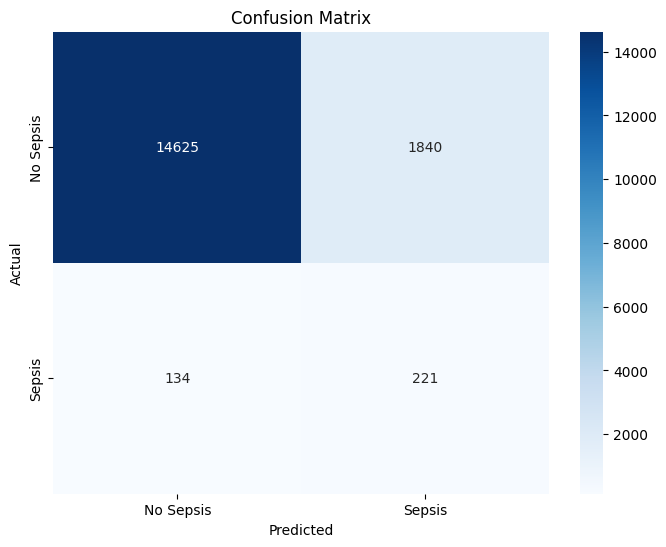

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Sepsis', 'Sepsis'],
            yticklabels=['No Sepsis', 'Sepsis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

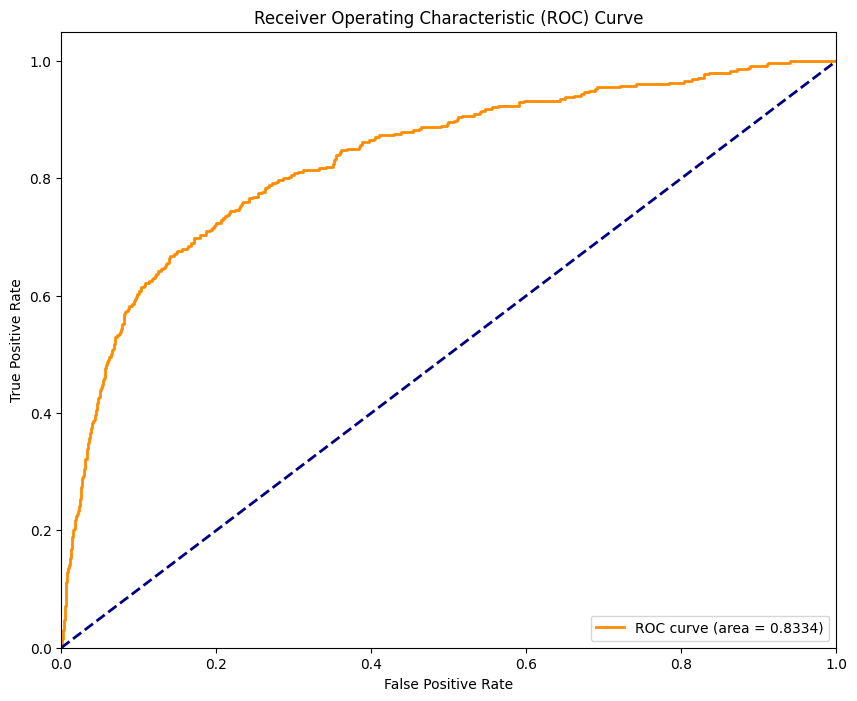

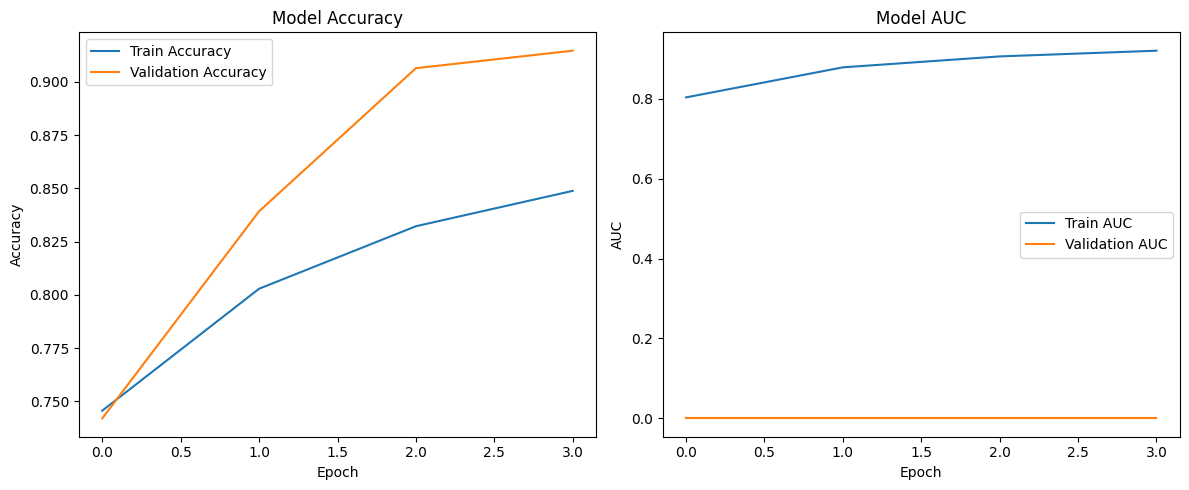

In [41]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# AUC plot
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
print("\nSaving model as 'sepsis_nn_model.h5'...")
model.save('sepsis_nn_model.h5')


Saving model as 'sepsis_nn_model.h5'...


Sepsis Detection Testing Tool
Which model would you like to use? (1) Gradient Boosting or (2) Neural Network? Enter 1 or 2: 2


Neural Network model loaded successfully!
Would you like to (1) input patient data manually or (2) use sample data? Enter 1 or 2: 2

Using sample patient data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Sepsis Prediction: NEGATIVE
Probability of Sepsis: 0.3321 (33.21%)


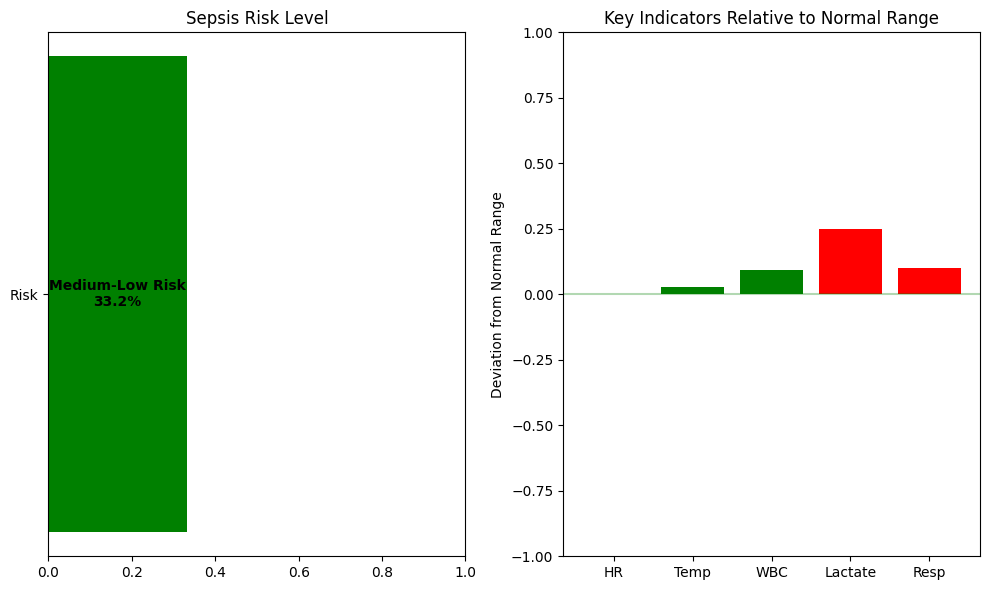

In [44]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def load_gb_model():
    """Load the Gradient Boosting model from pickle file"""
    try:
        with open('sepsis_prediction_model.pkl', 'rb') as f:
            model = pickle.load(f)
        print("Gradient Boosting model loaded successfully!")
        return model
    except FileNotFoundError:
        print("Error: sepsis_prediction_model.pkl not found.")
        return None

def load_nn_model():
    """Load the Neural Network model from h5 file"""
    try:
        model = tf.keras.models.load_model('sepsis_nn_model.h5')
        print("Neural Network model loaded successfully!")
        return model
    except:
        print("Error: sepsis_nn_model.h5 not found or could not be loaded.")
        return None

def get_feature_names():
    """Return the feature names used in the model"""
    # These should match the columns in your original dataset (excluding SepsisLabel)
    return ['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
           'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
           'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
           'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
           'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
           'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
           'HospAdmTime', 'ICULOS']

def input_patient_data():
    """Get patient data input from user or use sample data"""
    choice = input("Would you like to (1) input patient data manually or (2) use sample data? Enter 1 or 2: ")

    if choice == '1':
        print("\nEnter patient data (press Enter to use default values):")
        data = {}
        for feature in get_feature_names():
            val = input(f"{feature} (default=0): ")
            data[feature] = float(val) if val.strip() else 0.0
        return pd.DataFrame([data])
    else:
        # Sample data for a patient
        print("\nUsing sample patient data...")
        return pd.DataFrame([{
            'Hour': 10,
            'HR': 95,  # Heart rate
            'O2Sat': 97,  # Oxygen saturation
            'Temp': 38.5,  # Temperature (slightly elevated)
            'SBP': 110,  # Systolic blood pressure
            'MAP': 75,  # Mean arterial pressure
            'DBP': 65,  # Diastolic blood pressure
            'Resp': 22,  # Respiratory rate (slightly elevated)
            'EtCO2': 30,
            'BaseExcess': -2,
            'HCO3': 22,
            'FiO2': 0.21,
            'pH': 7.35,
            'PaCO2': 40,
            'SaO2': 97,
            'AST': 30,
            'BUN': 15,
            'Alkalinephos': 70,
            'Calcium': 9.0,
            'Chloride': 100,
            'Creatinine': 1.0,
            'Bilirubin_direct': 0.2,
            'Glucose': 120,  # Slightly elevated
            'Lactate': 2.5,  # Slightly elevated
            'Magnesium': 2.0,
            'Phosphate': 3.5,
            'Potassium': 4.0,
            'Bilirubin_total': 0.8,
            'TroponinI': 0.01,
            'Hct': 40,
            'Hgb': 14,
            'PTT': 30,
            'WBC': 12,  # White blood cell count (slightly elevated)
            'Fibrinogen': 300,
            'Platelets': 250,
            'Age': 65,
            'Gender': 1,  # 1 for male, 0 for female
            'Unit1': 1,
            'Unit2': 0,
            'HospAdmTime': 5,
            'ICULOS': 2
        }])

def preprocess_data(patient_data, scaler=None):
    """Preprocess the input data similar to the training pipeline"""
    # If no scaler provided, create a new one
    if scaler is None:
        scaler = StandardScaler()
        # We should ideally use the same scaler used during training
        # This is a simplification for the testing code
        scaler.fit(patient_data)

    # Scale the data
    patient_data_scaled = scaler.transform(patient_data)
    return patient_data_scaled, scaler

def predict_sepsis_gb(model, patient_data_scaled):
    """Make predictions using the Gradient Boosting model"""
    # Predict probability
    sepsis_probability = model.predict_proba(patient_data_scaled)[:, 1][0]
    # Predict class
    sepsis_prediction = model.predict(patient_data_scaled)[0]

    return sepsis_prediction, sepsis_probability

def predict_sepsis_nn(model, patient_data_scaled):
    """Make predictions using the Neural Network model"""
    # Predict probability
    sepsis_probability = model.predict(patient_data_scaled)[0][0]
    # Predict class
    sepsis_prediction = 1 if sepsis_probability >= 0.5 else 0

    return sepsis_prediction, sepsis_probability

def display_results(prediction, probability, patient_data):
    """Display the prediction results with a visualization"""
    print("\n" + "="*50)
    print(f"Sepsis Prediction: {'POSITIVE' if prediction == 1 else 'NEGATIVE'}")
    print(f"Probability of Sepsis: {probability:.4f} ({probability*100:.2f}%)")
    print("="*50)

    # Create a simple visualization of the result
    plt.figure(figsize=(10, 6))

    # Plot probability gauge
    plt.subplot(1, 2, 1)
    colors = ['green', 'yellow', 'orange', 'red']
    plt.barh(['Risk'], [probability], color=colors[int(min(probability*3, 3))])
    plt.xlim(0, 1)
    plt.title('Sepsis Risk Level')

    # Add risk level text
    risk_level = "Low"
    if probability >= 0.75:
        risk_level = "High"
    elif probability >= 0.5:
        risk_level = "Medium-High"
    elif probability >= 0.25:
        risk_level = "Medium-Low"

    plt.text(probability/2, 0, f"{risk_level} Risk\n{probability*100:.1f}%",
             ha='center', va='center', color='black', fontweight='bold')

    # Plot key indicators if available
    plt.subplot(1, 2, 2)
    key_indicators = ['HR', 'Temp', 'WBC', 'Lactate', 'Resp']
    indicator_values = []
    for indicator in key_indicators:
        if indicator in patient_data.columns:
            indicator_values.append(float(patient_data[indicator].values[0]))
        else:
            indicator_values.append(0)

    normal_ranges = [
        (60, 100),  # HR normal range
        (36.5, 37.5),  # Temp normal range in Celsius
        (4.5, 11),  # WBC normal range
        (0.5, 2),  # Lactate normal range
        (12, 20)  # Resp normal range
    ]

    # Normalize values for plotting
    normalized_values = []
    for i, val in enumerate(indicator_values):
        min_val, max_val = normal_ranges[i]
        if val < min_val:
            # Below normal range
            norm_val = -1 * (min_val - val) / min_val
        elif val > max_val:
            # Above normal range
            norm_val = (val - max_val) / max_val
        else:
            # Within normal range
            norm_val = 0
        normalized_values.append(norm_val)

    # Plot the normalized values
    colors = ['green' if abs(v) < 0.1 else 'red' for v in normalized_values]
    plt.bar(key_indicators, normalized_values, color=colors)
    plt.axhline(y=0, color='green', linestyle='-', alpha=0.3)
    plt.ylim(-1, 1)
    plt.title('Key Indicators Relative to Normal Range')
    plt.ylabel('Deviation from Normal Range')

    plt.tight_layout()
    plt.show()

def main():
    print("Sepsis Detection Testing Tool")
    print("="*30)

    # Ask which model to use
    model_choice = input("Which model would you like to use? (1) Gradient Boosting or (2) Neural Network? Enter 1 or 2: ")

    if model_choice == '1':
        model = load_gb_model()
        if model is None:
            print("Exiting due to model loading error.")
            return

        # Get patient data
        patient_data = input_patient_data()

        # Preprocess data
        patient_data_scaled, _ = preprocess_data(patient_data)

        # Make prediction
        prediction, probability = predict_sepsis_gb(model, patient_data_scaled)

        # Display results
        display_results(prediction, probability, patient_data)

    elif model_choice == '2':
        model = load_nn_model()
        if model is None:
            print("Exiting due to model loading error.")
            return

        # Get patient data
        patient_data = input_patient_data()

        # Preprocess data
        patient_data_scaled, _ = preprocess_data(patient_data)

        # Make prediction
        prediction, probability = predict_sepsis_nn(model, patient_data_scaled)

        # Display results
        display_results(prediction, probability, patient_data)

    else:
        print("Invalid choice. Please run the program again.")

if __name__ == "__main__":
    main()

Accuracy of Gradient Boosting Model is  0.93 and ROC-AUC value is 0.7431 which states that it is a fair to good model.

Accuracy of Neural Network is 0.94  and ROC-AUC value is 0.7719 which states that it is a fair to good model.